In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


from scipy import stats
from tqdm import tqdm

In [9]:
data = pd.read_csv('hw_aa.csv', delimiter=';')

In [10]:
data


,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [11]:
data.dtypes

Unnamed: 0            int64
uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [12]:
data.isna().sum()

Unnamed: 0           0
uid                  0
experimentVariant    0
version              0
purchase             0
dtype: int64

### 1. Подготовим данные 

In [28]:
# А1 группа
data_version_0 = data.query('experimentVariant == 0 ')['purchase']

In [29]:
# А2 группа
data_versrion_1 = data.query('experimentVariant == 1 ')['purchase']

In [30]:
data_version_0

1         0
6         0
8         0
11        0
16        0
         ..
127008    0
127011    0
127012    0
127013    0
127014    0
Name: purchase, Length: 63102, dtype: int64

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 368.85it/s]


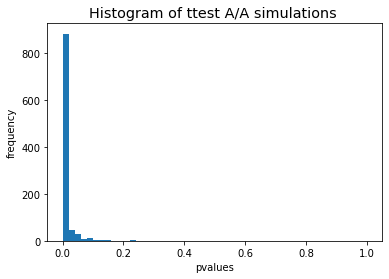

0.945

In [38]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = data_version_0.sample(n_s, replace = False).values
    s2 = data_versrion_1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

### 2. Сильное отклонение от 0.05, следовательно, необходимо понять, в чем может быть проблема 

In [41]:
data

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [42]:
data.groupby(['experimentVariant', 'version'])\
.agg({'purchase':'mean', 'Unnamed: 0':'count'})

purchase  Unnamed: 0
experimentVariant version                       
0                 v2.8.0    0.000993       41283
                  v2.9.0    0.074658       11921
                  v3.7.4.0  0.059943        4204
                  v3.8.0.0  0.057604        5694
1                 v2.8.0    0.045606       41552
                  v2.9.0    0.071304       12033
                  v3.7.4.0  0.063018        4221
                  v3.8.0.0  0.062848        6110

In [44]:
### В экспериментальной группе 0, у пользователей с версией v.2.8.0 сильное падение конверсии в покупку
### по сравнению с экспериментальной группой 1 или ,наоборот, у сильный рост у экс. группы 1 по сравнению с группой 0 

### 3. Сравним экс. группы 1 и 0 в версиях 2.8.0

In [47]:
data[(data['experimentVariant']  == 0) & (data['version']  == 'v2.8.0')]['purchase']

data[(data['experimentVariant']  == 1) & (data['version']  == 'v2.8.0')]['purchase']

8         0
11        0
16        0
18        0
19        0
         ..
127008    0
127011    0
127012    0
127013    0
127014    0
Name: purchase, Length: 41283, dtype: int64

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.19it/s]


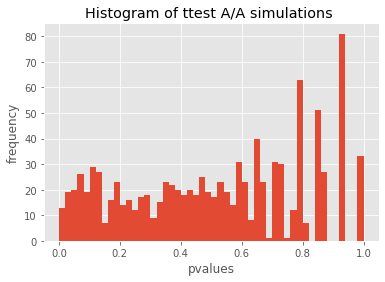

0.042

In [49]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = data[(data['experimentVariant']  == 0) & (data['version']  != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = data[(data['experimentVariant']  == 1) & (data['version']  != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [58]:
data[(data['experimentVariant']  == 1) & (data['version']  == 'v2.8.0')]['purchase'].value_counts(normalize=True)[1]

0.04560550635348479

In [59]:
data[(data['experimentVariant']  == 0) & (data['version']  == 'v2.8.0')]['purchase'].value_counts(normalize=True)[1]

0.0009931448780369644

In [61]:
np.abs((data[(data['experimentVariant']  == 0) & (data['version']  == 'v2.8.0')]['purchase'].value_counts(normalize=True)[1] 
- data[(data['experimentVariant']  == 1) & (data['version']  == 'v2.8.0')]['purchase'].value_counts(normalize=True)[1])/data[(data['experimentVariant']  == 0) & (data['version']  == 'v2.8.0')]['purchase'].value_counts(normalize=True)[1])

44.920295580266156

## Вывод:

###  1) На основании проведенного A/A теста можно утвержать, что система сплитования сломалась в группах с версиями v.2.8.0
### 2) Различие в кол-ве пользователей, имеющих конверсию покупки в экс.группах 1 и 0 в версии приложения v.2.8.0. составляет 44%. Данное значени существенно влияет на качество выборки 